# cargamos las librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Cargamos los dataframes

In [2]:
dataframe = pd.read_csv('fuel.csv', encoding='ISO-8859-1')
dataframe.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


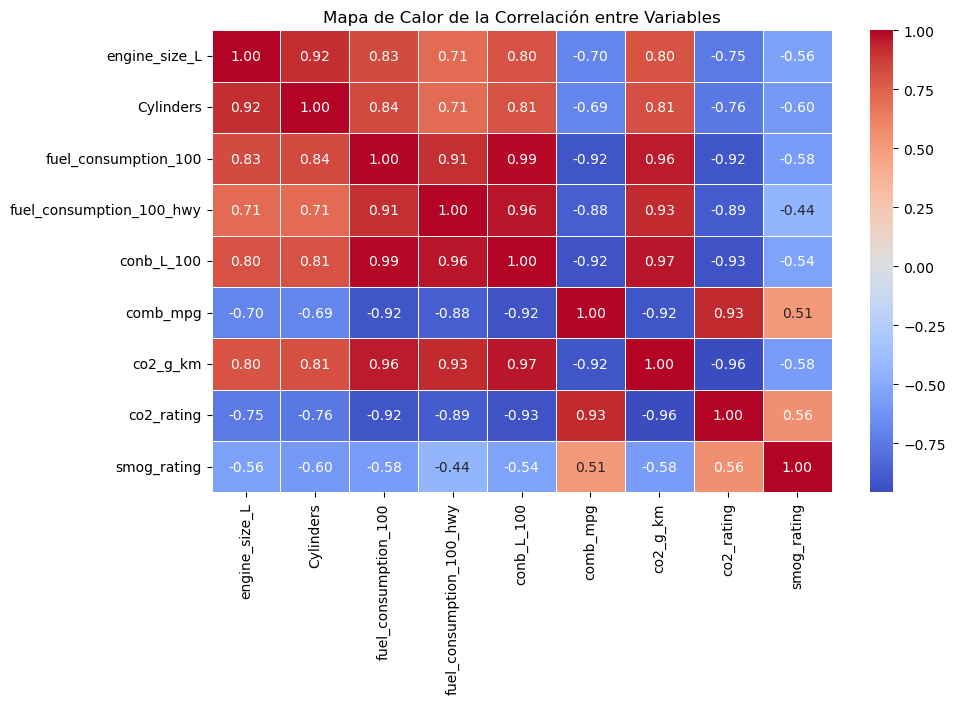

,engine_size_L,Cylinders,fuel_consumption_100,fuel_consumption_100_hwy,conb_L_100,comb_mpg,co2_g_km,co2_rating,smog_rating
engine_size_L,1.000000,0.916829,0.825360,0.713320,0.801426,-0.697485,0.797470,-0.751129,-0.557302
Cylinders,0.916829,1.000000,0.837887,0.709302,0.808144,-0.693822,0.814199,-0.759751,-0.597320
fuel_consumption_100,0.825360,0.837887,1.000000,0.913103,0.988970,-0.918555,0.958426,-0.920071,-0.580338
fuel_consumption_100_hwy,0.713320,0.709302,0.913103,1.000000,0.963200,-0.876323,0.926156,-0.886583,-0.438331
conb_L_100,0.801426,0.808144,0.988970,0.963200,1.000000,-0.922058,0.966304,-0.926795,-0.540746
comb_mpg,-0.697485,-0.693822,-0.918555,-0.876323,-0.922058,1.000000,-0.916187,0.929957,0.512166
co2_g_km,0.797470,0.814199,0.958426,0.926156,0.966304,-0.916187,1.000000,-0.959107,-0.581288
co2_rating,-0.751129,-0.759751,-0.920071,-0.886583,-0.926795,0.929957,-0.959107,1.000000,0.559560
smog_rating,-0.557302,-0.597320,-0.580338,-0.438331,-0.540746,0.512166,-0.581288,0.559560,1.000000


In [3]:


dataframe = dataframe.rename(columns={'Vehicle Class': 'veicle_class','Engine Size (L)': 'engine_size_L', 'Fuel Type': 'fuel_type','Fuel Consumption (L/100Km)': 'fuel_consumption_100','Hwy (L/100 km)': 'fuel_consumption_100_hwy', 'Comb (L/100 km)': 'conb_L_100', 'Comb (mpg)': 'comb_mpg', 'CO2 Emissions (g/km)': 'co2_g_km','CO2 Rating': 'co2_rating', 'Smog Rating': 'smog_rating' })


columnas_interes = ['engine_size_L', 'Cylinders', 'fuel_consumption_100','fuel_consumption_100_hwy', 'conb_L_100',  'comb_mpg', 'co2_g_km', 'co2_rating', 'smog_rating']
dataframe_limpio = dataframe[columnas_interes]

corr = dataframe_limpio.corr()

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

corr

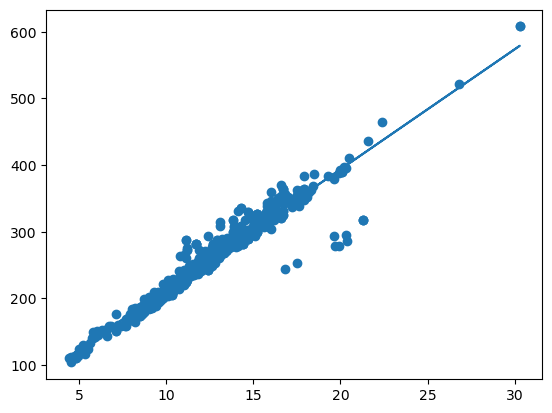

In [4]:
x = dataframe_limpio[['fuel_consumption_100']].values

y = dataframe_limpio['co2_g_km']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train))
plt.show()


In [5]:
consumo_autopista_inventado = np.array([[30]])  # Importante que esté en formato 2D
emisiones_prediccion = regressor.predict(consumo_autopista_inventado)
# mirar comparaciones, error cuadratico medio...
# emisiones_prediccion

print(f"Las emisiones estimadas para un consumo de {consumo_autopista_inventado[0][0]} son {emisiones_prediccion[0]:,.2f} g/Km")

Las emisiones estimadas para un consumo de 30 son 573.70 g/Km


In [6]:
emisiones_prediccion = regressor.predict(x_test)
emisiones_prediccion

array([255.19759254, 213.80980426, 233.60396387, 208.4113971 ,
       251.59865443, 219.20821143, 206.61192804, 177.82042315,
       230.00502576, 208.4113971 , 237.20290198, 267.79387593,
       197.61458276, 237.20290198, 186.81776843, 172.42201599,
       231.80449482, 262.39546876, 217.40874237, 253.39812348,
       224.6066186 , 226.40608765, 226.40608765, 298.38484987,
       185.01829938, 391.95724075, 269.59334498, 231.80449482,
       368.56414303, 255.19759254, 197.61458276, 174.22148504,
       319.97847853, 417.14980753, 318.17900948, 323.57741664,
       249.79918537, 212.01033521, 265.99440687, 230.00502576,
       185.01829938, 237.20290198, 251.59865443, 269.59334498,
       228.20555671, 402.75405508, 269.59334498, 215.60927332,
       323.57741664, 224.6066186 , 314.58007137, 230.00502576,
       368.56414303, 249.79918537, 203.01298993, 210.21086615,
       204.81245899, 221.00768048, 319.97847853, 258.79653065,
       181.41936126, 307.38219515, 226.40608765, 301.98

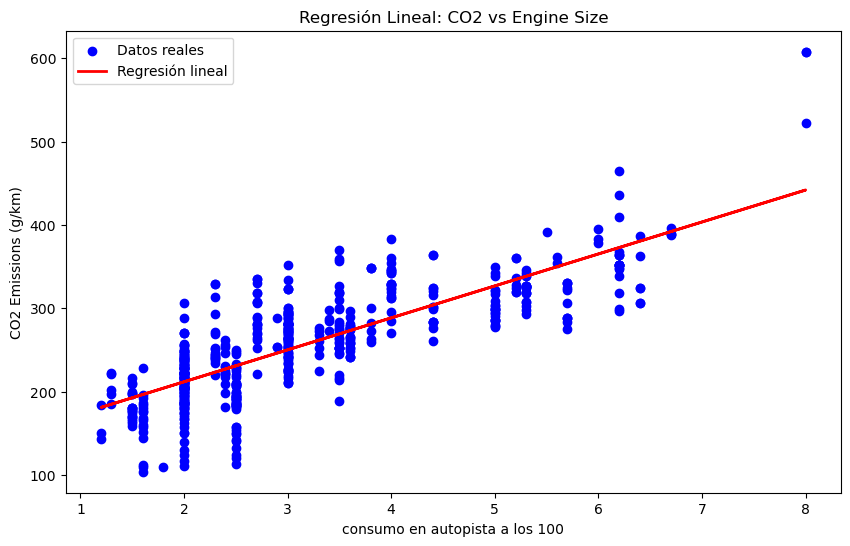

Coeficiente: 38.35968086886395
Intercepto: 135.18751220610773


In [7]:


# Seleccionar característica (Engine Size) y variable objetivo (CO2 Emissions)
X = dataframe_limpio[['engine_size_L']]
y = dataframe_limpio['co2_g_km']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Entrenar modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicciones
y_pred = regressor.predict(X_test)

# Graficar en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('consumo en autopista a los 100')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Regresión Lineal: CO2 vs Engine Size')
plt.legend()
plt.show()

# Imprimir coeficientes del modelo
print("Coeficiente:", regressor.coef_[0])
print("Intercepto:", regressor.intercept_)


In [8]:
cilindros_inventados = np.array([[8]])  # Importante que esté en formato 2D
emisiones_prediccion = regressor.predict(cilindros_inventados)

print(f"Las emisiones estimadas para un ctamaño de cilindros de {cilindros_inventados[0][0]} son {emisiones_prediccion[0]:,.2f} g/Km")

Las emisiones estimadas para un ctamaño de cilindros de 8 son 442.06 g/Km


c:\Users\enrique.granadosmart\AppData\Local\miniconda3\envs\bigdata\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Regularización

# Multivariable

# Evaluar el modelo
 Hola caracola


In [9]:

from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes 'dataframe_limpio' cargado y preparado

# Definir las variables independientes y la dependiente
x = dataframe_limpio[['fuel_consumption_100', 'engine_size_L', 'comb_mpg']].values
y = dataframe_limpio['co2_g_km']

# Dividir los datos en conjuntos de entrenamiento (70%) y de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Crear y entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Realizar predicciones en ambos conjuntos
y_train_pred = regressor.predict(x_train)
y_test_pred  = regressor.predict(x_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Conjunto de Entrenamiento:")
print("MSE: {:.2f}".format(mse_train))
print("R²: {:.2f}".format(r2_train))

print("\nConjunto de Test:")
print("MSE: {:.2f}".format(mse_test))
print("R²: {:.2f}".format(r2_test))



Conjunto de Entrenamiento:
MSE: 286.90
R²: 0.93

Conjunto de Test:
MSE: 320.04
R²: 0.92


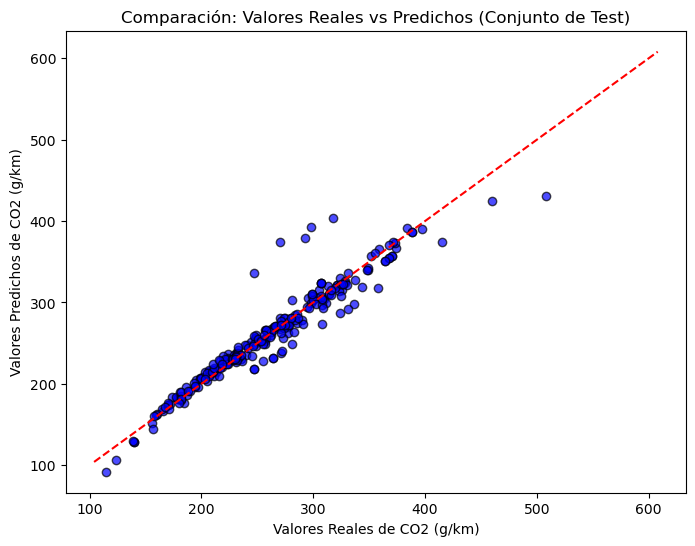

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel("Valores Reales de CO2 (g/km)")
plt.ylabel("Valores Predichos de CO2 (g/km)")
plt.title("Comparación: Valores Reales vs Predichos (Conjunto de Test)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia: ideal (predicción perfecta)
plt.show()


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Supongamos que y_test son los valores reales
# Modelo base: predicción constante con la media de y_train
mean_pred = np.mean(y_train)
y_pred_base = np.full(shape=y_test.shape, fill_value=mean_pred)

mse_base = mean_squared_error(y_test, y_pred_base)
mse_model = mean_squared_error(y_test, y_test_pred)  # de tu modelo

print("MSE del modelo base:", mse_base)
print("MSE del modelo:", mse_model)


MSE del modelo base: 3888.8102869348522
MSE del modelo: 320.04387528767927
